In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Analysis of Super Store - DA.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
df.shape

(9994, 12)

In [17]:
df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State   
0       Second Class   Consumer  United States        Henderson    Kentucky  \
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

     Region        

In [18]:
pd.isnull(df)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
pd.isnull(df).sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.drop(df.columns[5],axis=1 ,inplace= True)

In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


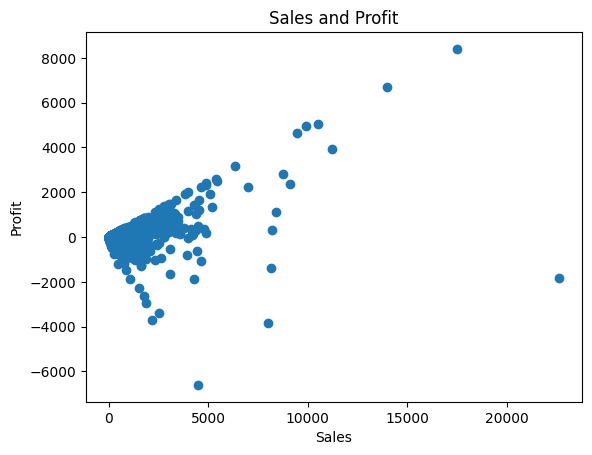

In [8]:
plt.scatter(df['Sales'], df['Profit'])


plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales and Profit')


plt.show()

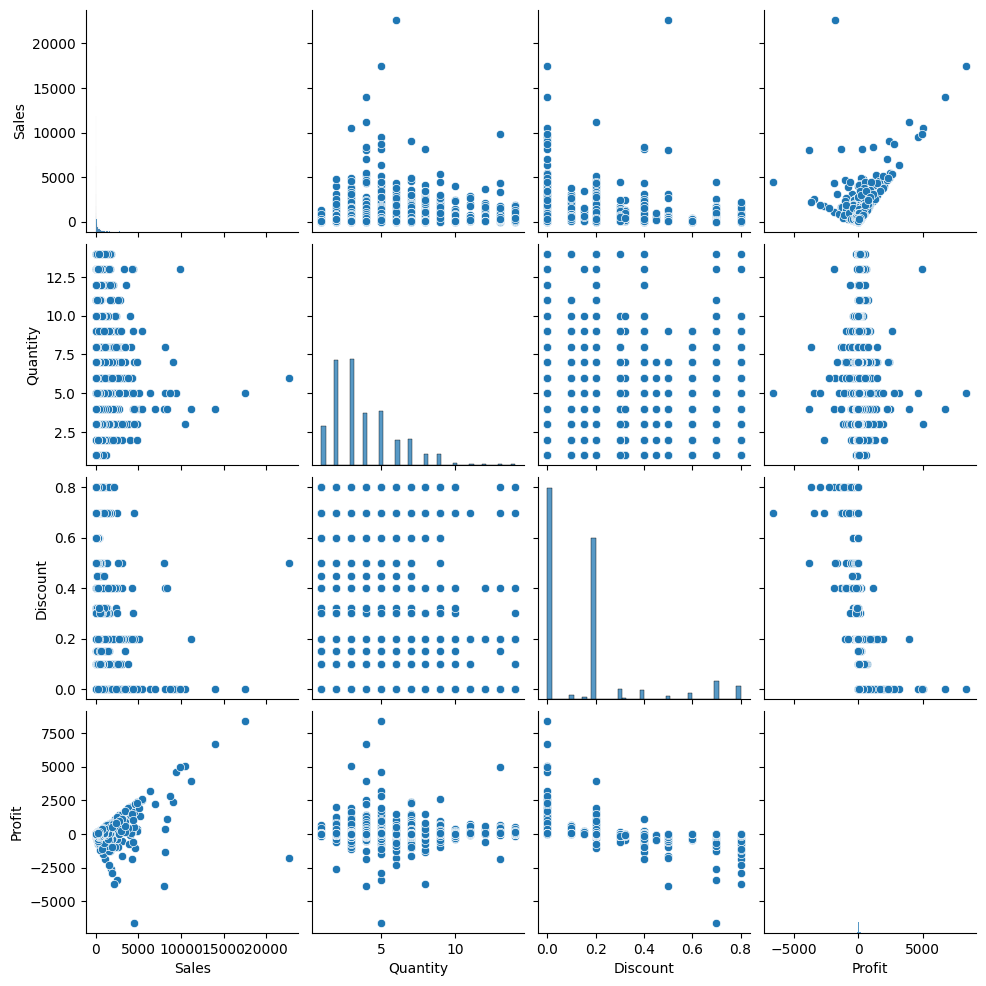

In [9]:
sns.pairplot(df)

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

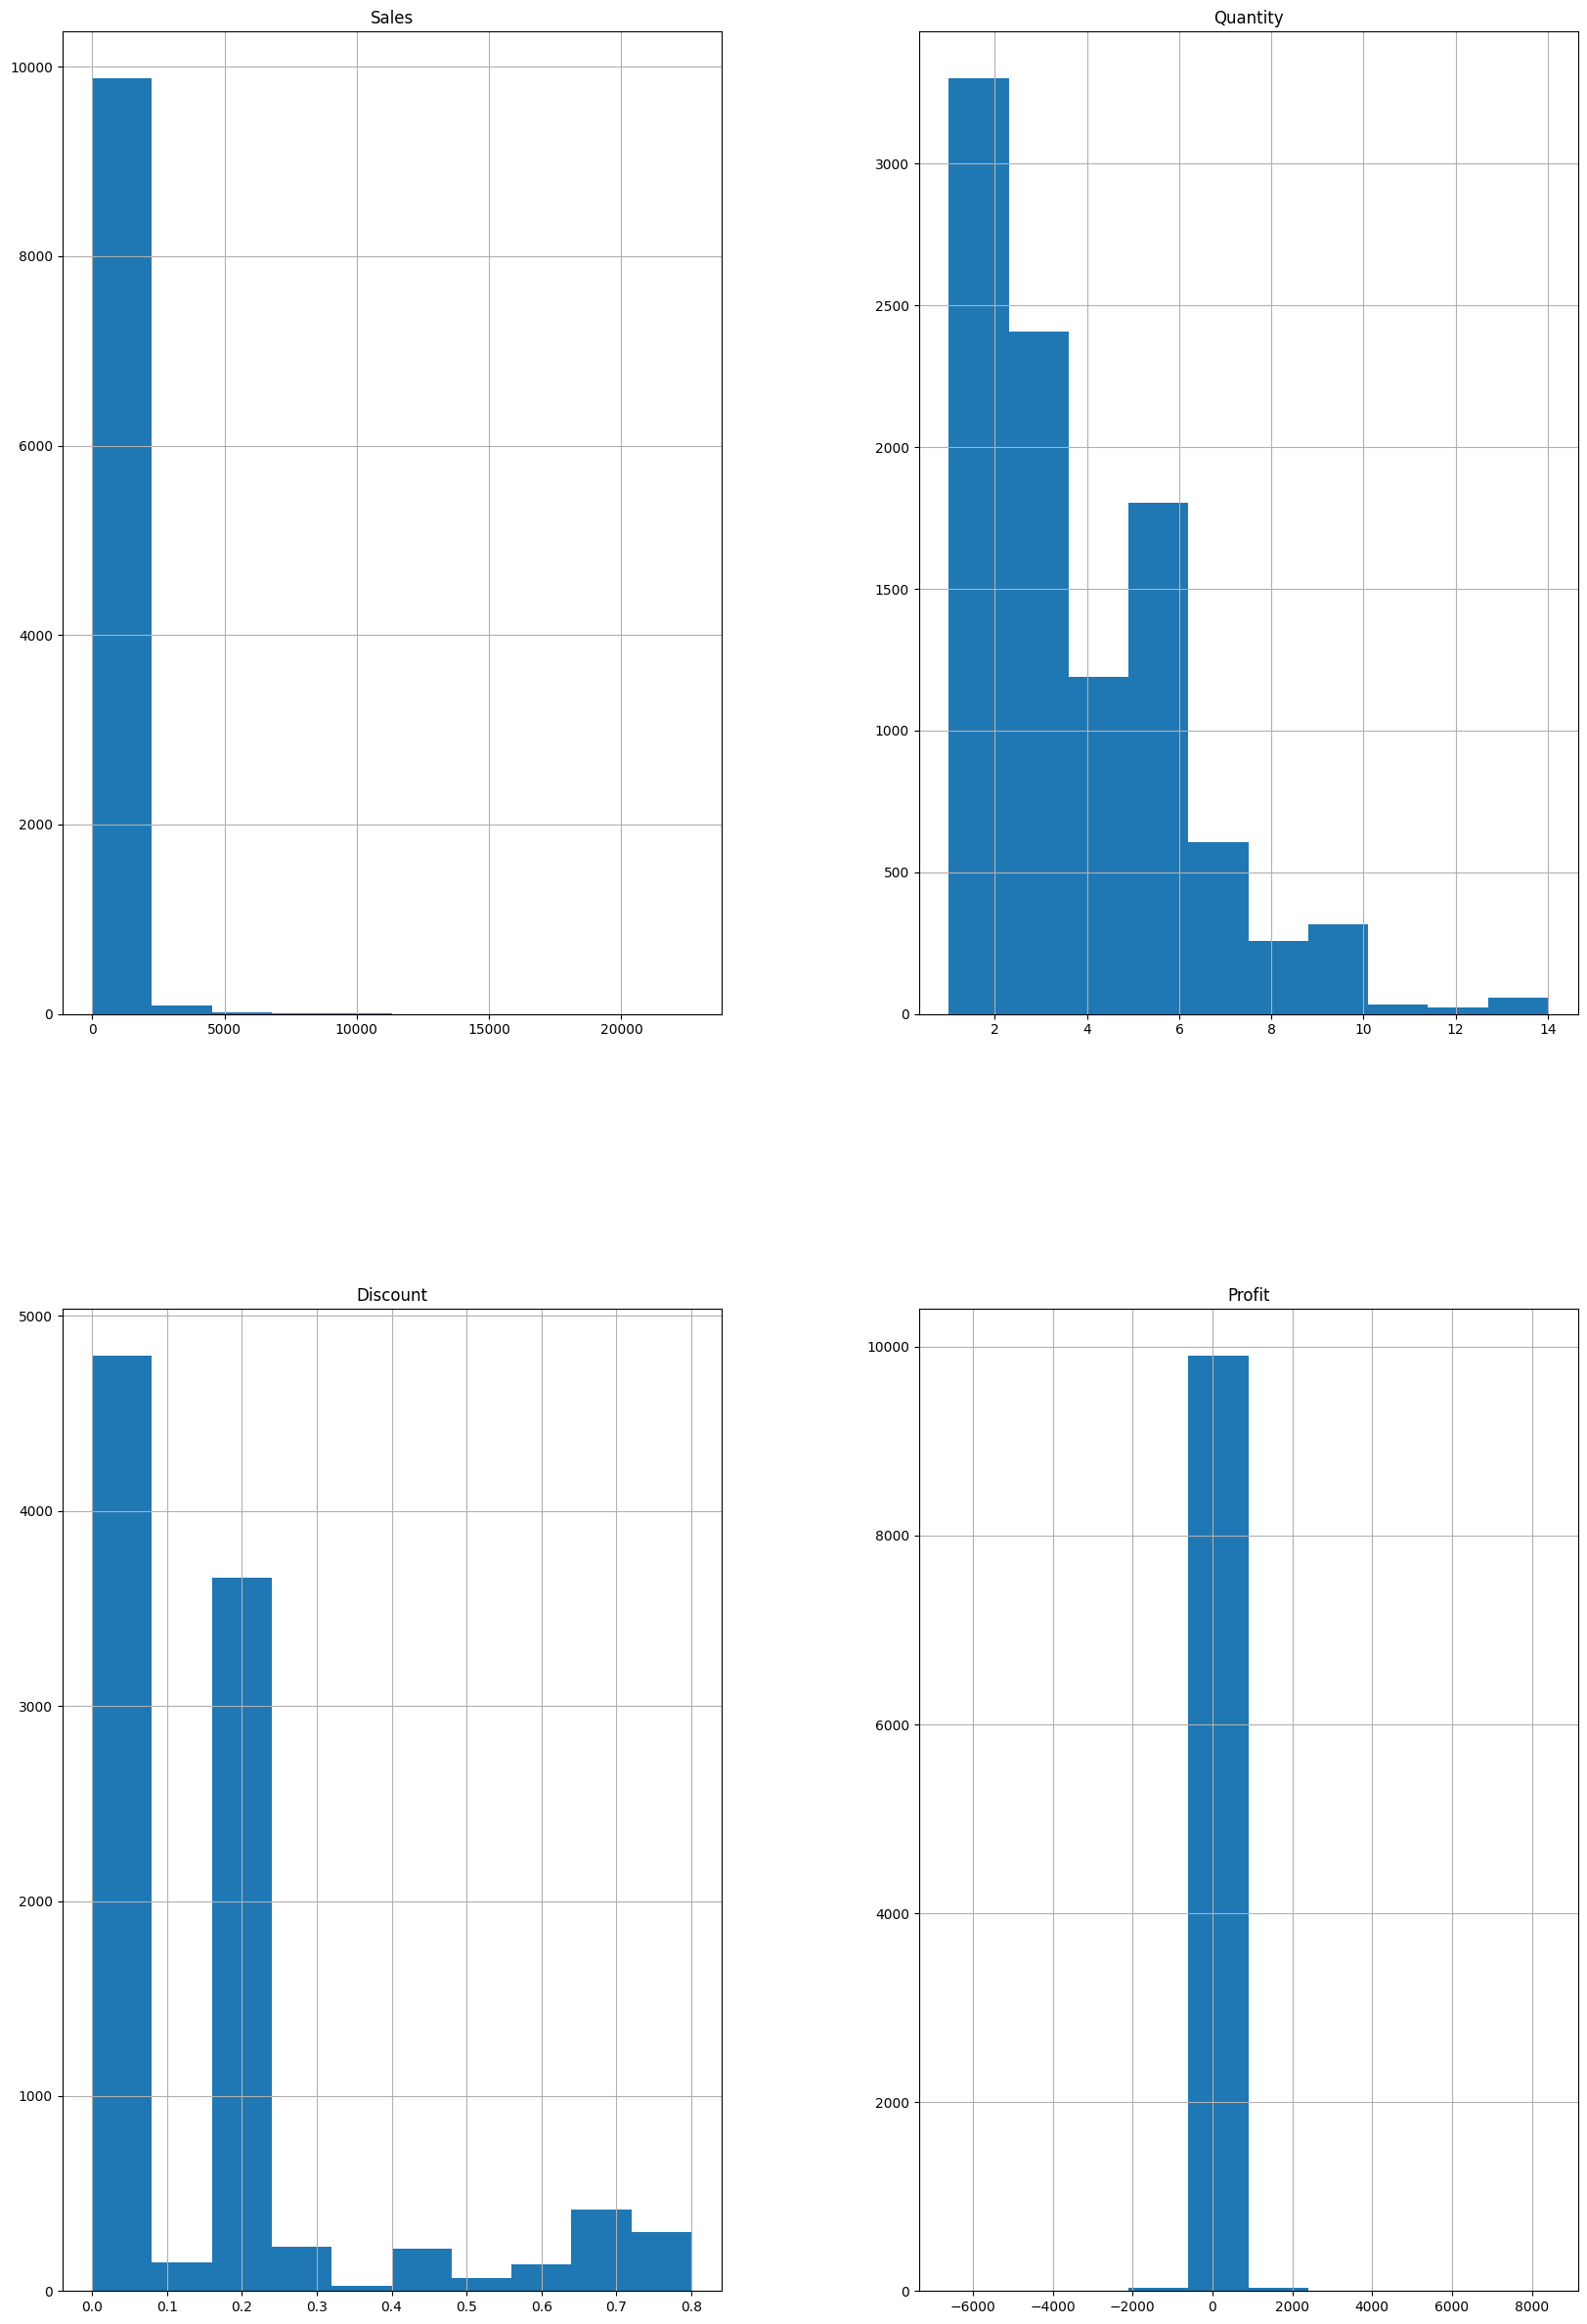

In [11]:
df.hist(figsize=(20,30))

<Axes: xlabel='Region', ylabel='count'>

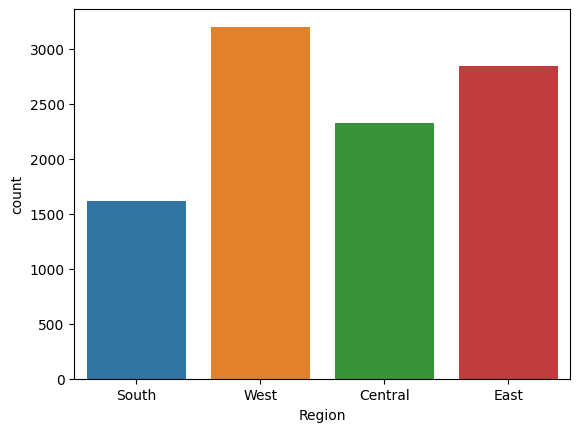

In [44]:
sns.countplot(x='Region' ,data= df)

<Axes: xlabel='Segment', ylabel='count'>

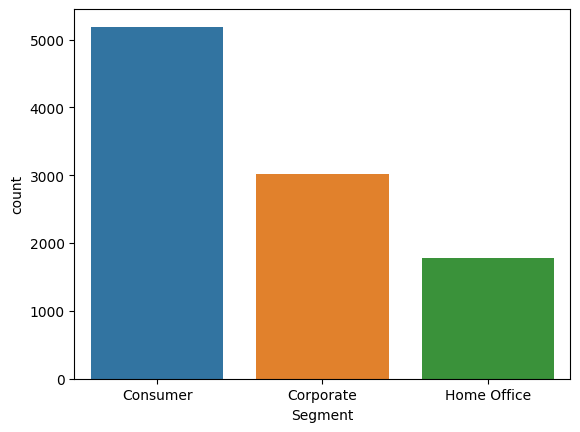

In [46]:
sns.countplot(x='Segment',data=df)

<Axes: xlabel='Segment', ylabel='Sales'>

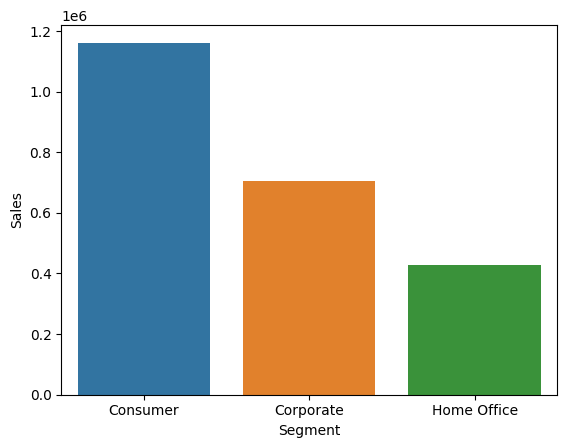

In [49]:
sales_gen = df.groupby(['Segment'],as_index = False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sns.barplot(x='Segment',y='Sales',data= sales_gen)

In [25]:
profitable_products = pd.DataFrame(df.groupby(['City']).sum()['Profit'])
profitable_products.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_products.head(15)

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Seattle'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Detroit'),
  Text(5, 0, 'Lafayette'),
  Text(6, 0, 'Jackson'),
  Text(7, 0, 'Atlanta'),
  Text(8, 0, 'Minneapolis'),
  Text(9, 0, 'San Diego'),
  Text(10, 0, 'Springfield'),
  Text(11, 0, 'Columbus'),
  Text(12, 0, 'Newark'),
  Text(13, 0, 'Columbia'),
  Text(14, 0, 'Richmond')])

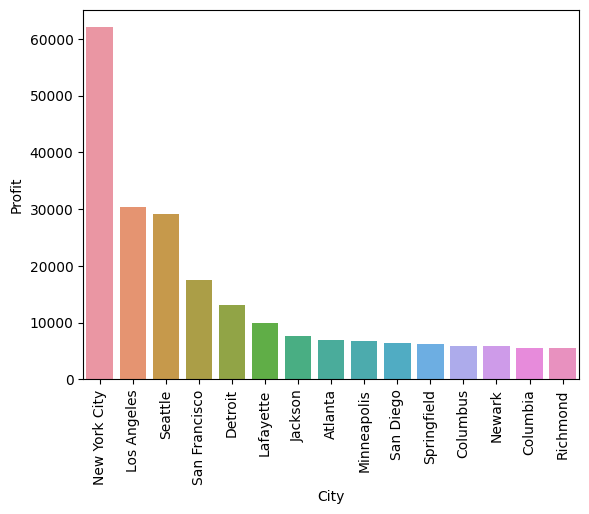

In [26]:
sns.barplot(x='City',y='Profit',data=profitable_products.head(15).reset_index())
plt.xticks(rotation = 'vertical')

In [29]:
profitable_products = pd.DataFrame(df.groupby(['City']).sum()['Sales'])
profitable_products.sort_values(by=['Sales'], inplace = True, ascending = False)
profitable_products.head(15)

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Seattle'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Philadelphia'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'San Diego'),
  Text(8, 0, 'Jacksonville'),
  Text(9, 0, 'Springfield'),
  Text(10, 0, 'Detroit'),
  Text(11, 0, 'Columbus'),
  Text(12, 0, 'Newark'),
  Text(13, 0, 'Columbia'),
  Text(14, 0, 'Lafayette')])

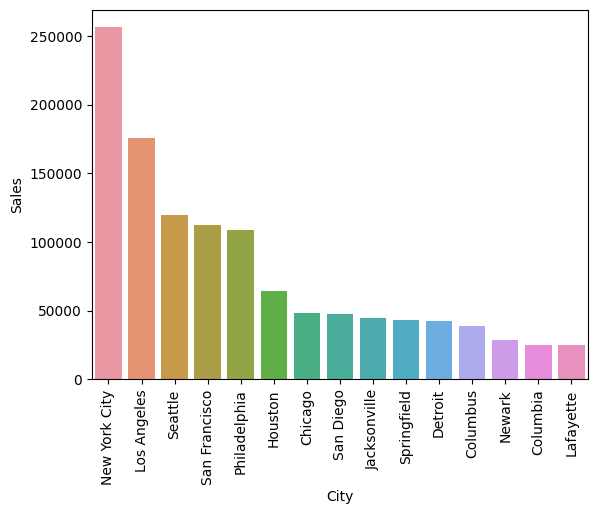

In [30]:
sns.barplot(x='City',y='Sales',data=profitable_products.head(15).reset_index())
plt.xticks(rotation = 'vertical')

In [33]:
city = pd.DataFrame(df.groupby('City').sum()['Sales'])
city.sort_values('Sales',inplace=True, ascending=False)
city.head(10)

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


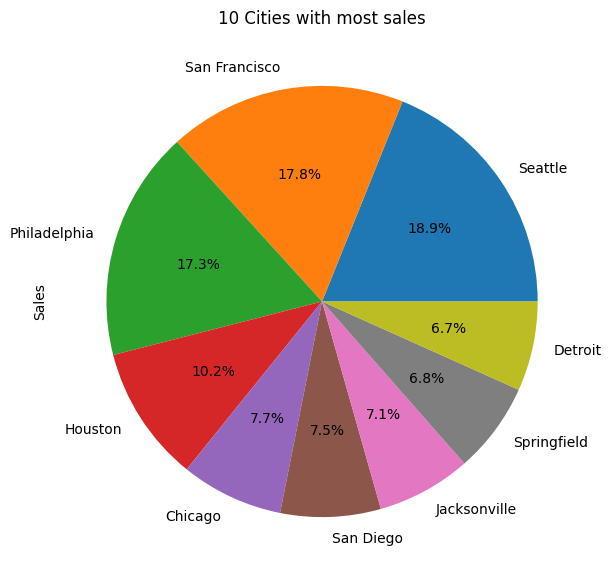

In [35]:
city = city.sort_values(by = 'Sales',ascending = False)[1:11]
city['Sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Cities with most sales')
plt.show()

In [36]:
city = pd.DataFrame(df.groupby('City').sum()['Profit'])
city.sort_values('Profit',inplace=True, ascending=False)
city.head(10)

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


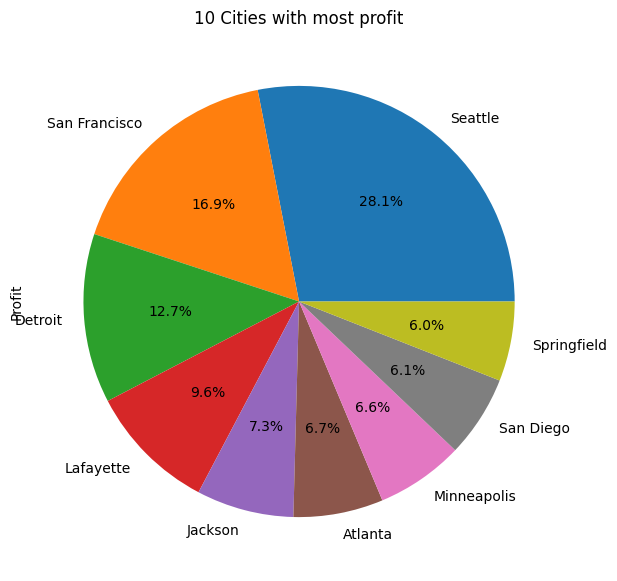

In [38]:
city = city.sort_values(by = 'Profit',ascending = False)[1:11]
city['Profit'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Cities with most profit')
plt.show()

<Axes: xlabel='Region'>

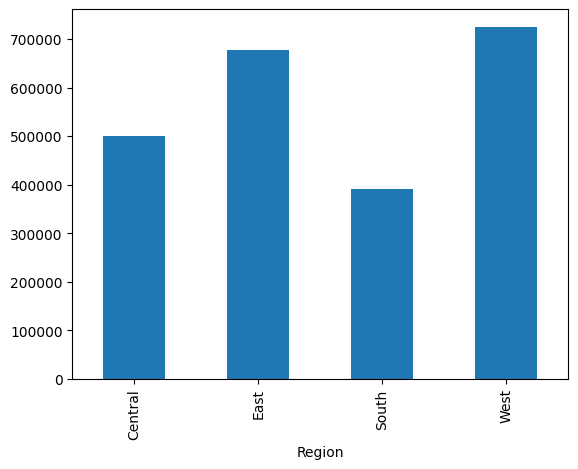

In [40]:
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Region'>

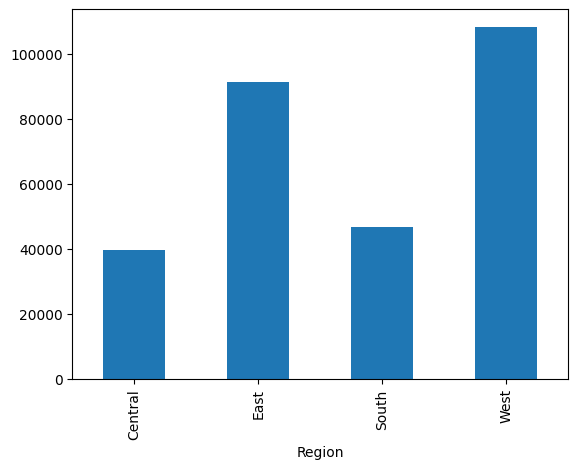

In [41]:
df.groupby("Region")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

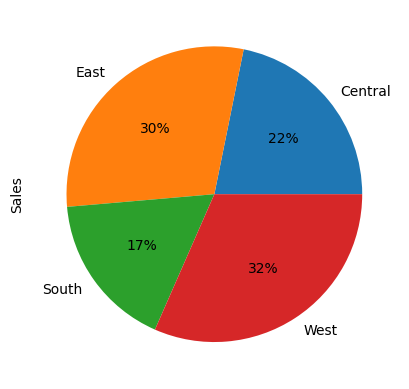

In [42]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

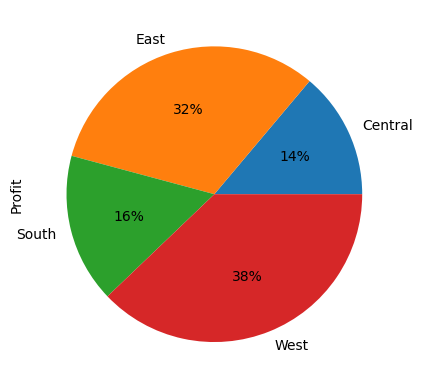

In [43]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Segment'>

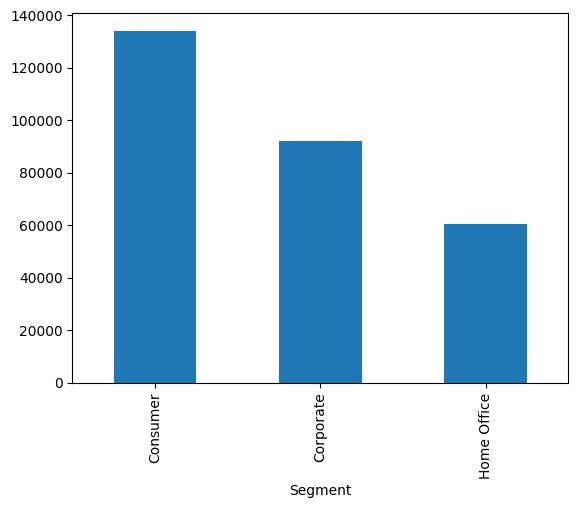

In [50]:
df.groupby("Segment")["Profit"].sum().plot.bar()